## Data Preparation
* a. Read the selected data, list the fields/variables, and identify their types

* b. List the inconsistencies, missing data, and outliers. Fix the inconsistencies, impute the
missing data, and remove the outliers.


Note: If your data does not have inconsistencies, missing observations, or outliers, it is
suggested to create them manually and apply methods to show your skills.

In [120]:
#Reading & displaying the data 
import pandas as pd
df = pd.read_csv('iseProjectData.csv', delimiter = ',')
display(df.head())
#inconsistency in MonthlyIncome it has commas
df.loc[:,"MonthlyIncome"]
#get the number of columns
df.shape[1]
#Dipsplay all the columns
df.columns



Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                     NaN   
1  -49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4  -27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1            NaN              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1          80.0                 0   
1  ...                         4          80.0                 1   
2  ...                         2          80.0                 0   
3  ...                         3           NaN                 0   
4  ...                         4          80.0                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                       0                     5  
1                  7                       1                     7  
2                  0                       0                     0  
3                  7                       3                     0  
4                  2                       2                     2  

[5 rows x 35 columns]

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [121]:
# resolving inconsistency
df["MonthlyIncome"]=df["MonthlyIncome"].apply(lambda x: int(x.replace(",","")))
df.loc[:,"MonthlyIncome"]

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

In [122]:
# Filter/smooth noisy data: Any negative numeric value should be replaced by its absolute value.
# all of our numeric columns should be positive so any minus sign is a typo
seleted_cols= df.select_dtypes(exclude='object').columns
df[seleted_cols]=df[seleted_cols].applymap(lambda x: x if x>=0 else abs(x))
display(df)

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                     NaN   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1            NaN              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1          80.0   
1                  2  ...                         4          80.0   
2                  4  ...                         2          80.0   
3                  5  ...                         3           NaN   
4                  7  ...                         4          80.0   
...              ...  ...                       ...           ...   
1465            2061  ...                         3          80.0   
1466            2062  ...                         1          80.0   
1467            2064  ...                         2          80.0   
1468            2065  ...                         4          80.0   
1469            2068  ...                         1          80.0   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [123]:
# Handle any missing data appropriately
#To drop all columns containing 50% or more missing values. 
df.dropna(axis=1, thresh=int(0.5 * df.shape[0]), inplace=True)
#filling the rest of the nan values
null_columns=df.columns[df.isna().any()]
print('Columns with NaN values are:', null_columns)
for c in null_columns:
    if df[c].dtype!='object':
        value = df[c].mean()
    else:
        value = df[c].mode()
        value = value[0]
    df[c].fillna(value,inplace=True)
display(df)

Columns with NaN values are: Index(['Department', 'EducationField', 'JobRole', 'StandardHours'], dtype='object')


Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102  Research & Development   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1  Life Sciences              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1          80.0   
1                  2  ...                         4          80.0   
2                  4  ...                         2          80.0   
3                  5  ...                         3          80.0   
4                  7  ...                         4          80.0   
...              ...  ...                       ...           ...   
1465            2061  ...                         3          80.0   
1466            2062  ...                         1          80.0   
1467            2064  ...                         2          80.0   
1468            2065  ...                         4          80.0   
1469            2068  ...                         1          80.0   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [124]:
#data wrangling/mugging
#in NumCompaniesWorked it seems that some data are accidentally put in a 0.x format 
#while num of companies should be an integer
print(df.loc[:,"NumCompaniesWorked"])
df["NumCompaniesWorked"]=df["NumCompaniesWorked"].apply(lambda x: x if x>=1 else 10*x)
print(df.loc[:,"NumCompaniesWorked"])
df.info()

0       8.0
1       0.1
2       6.0
3       1.0
4       0.9
       ... 
1465    4.0
1466    4.0
1467    1.0
1468    0.2
1469    2.0
Name: NumCompaniesWorked, Length: 1470, dtype: float64
0       8.0
1       1.0
2       6.0
3       1.0
4       9.0
       ... 
1465    4.0
1466    4.0
1467    1.0
1468    2.0
1469    2.0
Name: NumCompaniesWorked, Length: 1470, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField     

In [125]:
df.shape[1]
df.describe()
#Seperate the data into numeric and categorical
num_columns = df.select_dtypes(exclude='object').columns
cat_columns = df.select_dtypes(include='object').columns
#Display the numeric columns
print(num_columns)

#Get the categorical columns and their unique values

for c in cat_columns:
    print(c, df[c].unique())

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Research & Development' 'Sales' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Rep

## Model Planning
* a. Run the exploratory data analysis:
    - i. Find the statistical summaries.
    - ii. Make univariate graphs (i.e., graphs based on single variable).
    - iii. Prepare bivariate plots (i.e., plots based on two variables).
    - iv. Portray advanced graphs (i.e., graphs based on more than two variables).
    - v. Assess the relationship between variables.
* b. Summarise your findings.
In this course, we cover three model types: regression models, classification models, and
clustering. Choose the suitable modeling technique for the successful achievement of your
objectives and provide the justification.

# i. Find the statistical summaries.

In [126]:
#Find statitical summaries
#Describe numeric columns
print('Numerical columns description:')
display(df.describe())
#Describe categorical columns
print('Categorical columns description:')
display(df.describe(include='object'))


Numerical columns description:


Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

Categorical columns description:


Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     962            609    882   

                JobRole MaritalStatus OverTime  
count              1470          1470     1470  
unique                9             3        2  
top     Sales Executive       Married       No  
freq                332           673     1054

# ii. Make univariate graphs (i.e., graphs based on single variable).

Numerical columns are: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Non-numerical columns are: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


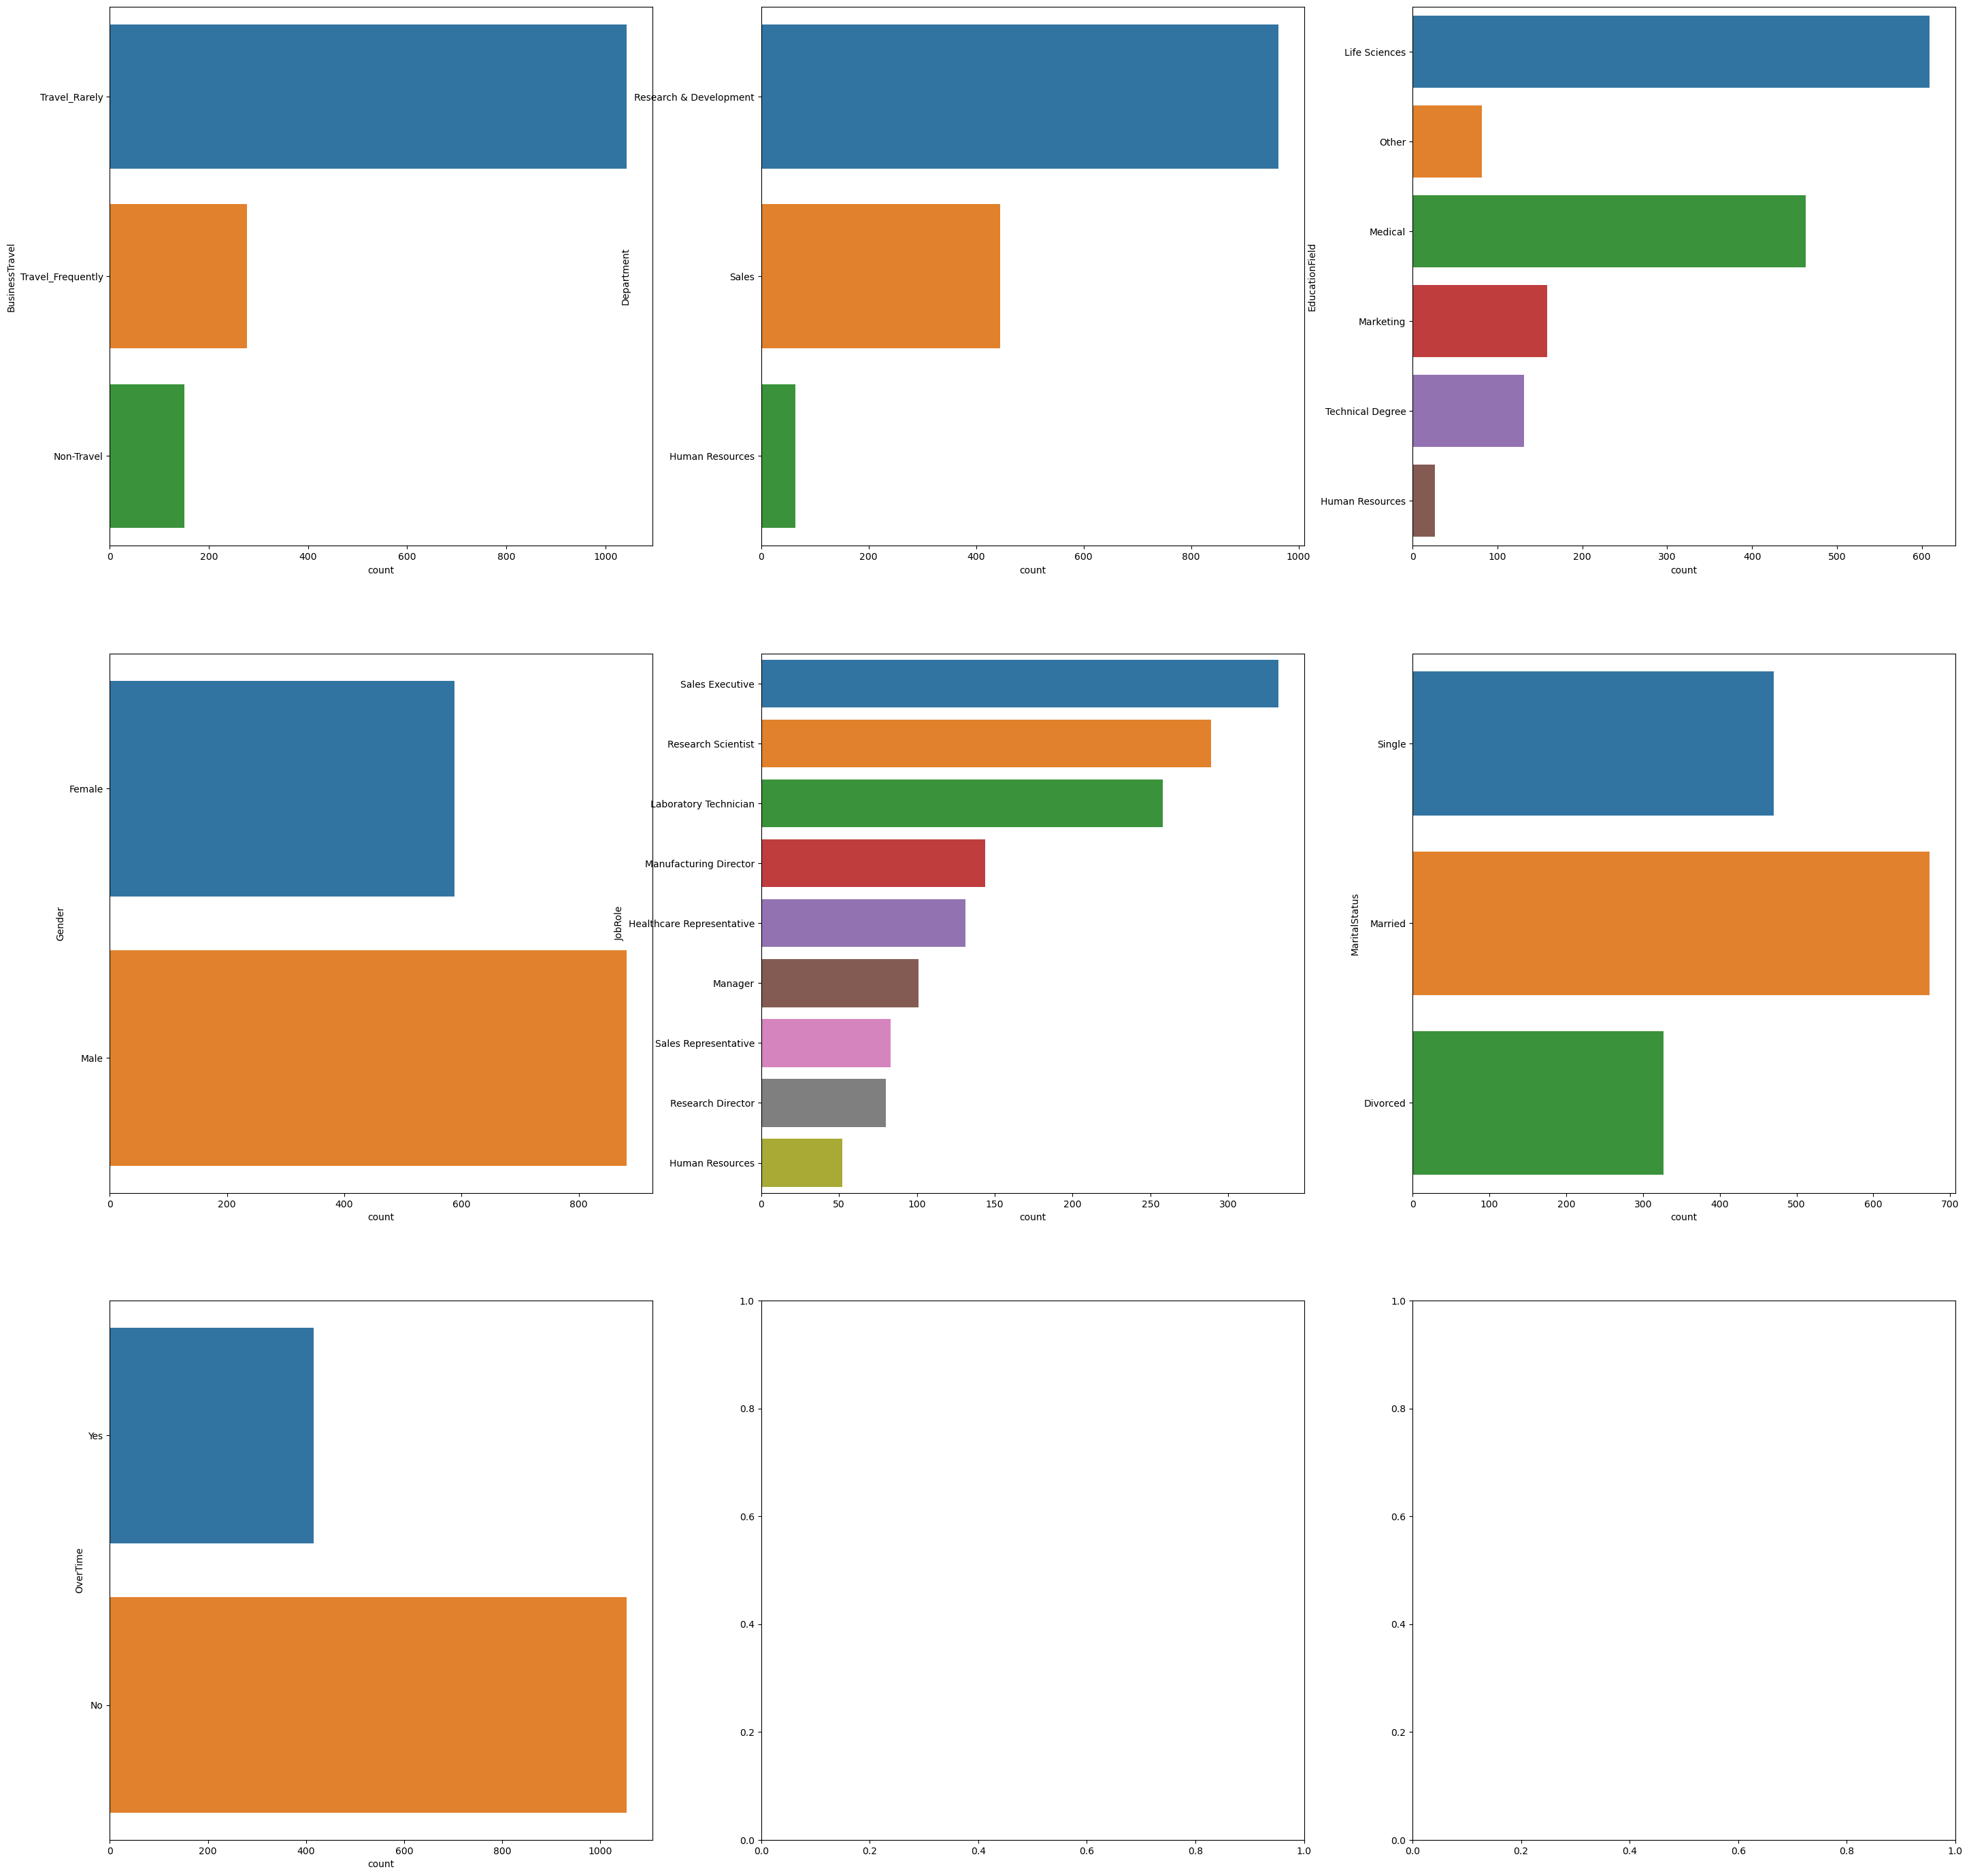

In [127]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
#Deep copy the data
df_copy = df.copy()
#Save the output column
Output = df['Attrition']
#Drop our output column
df.drop('Attrition', axis=1, inplace=True)
cat_columns = cat_columns.drop('Attrition')



print(f'Numerical columns are: {num_columns.tolist()}')
print(f'Non-numerical columns are: {cat_columns.tolist()}')

nCols=3   # The number of columns in the figure
nRows=len(cat_columns)//nCols+1   # The number of correspomding rows 

## to avoid rotating labels:
fig,axes = plt.subplots(nRows, nCols, figsize=(35,35))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,data=df,ax=axes.flatten()[ind])
plt.show()



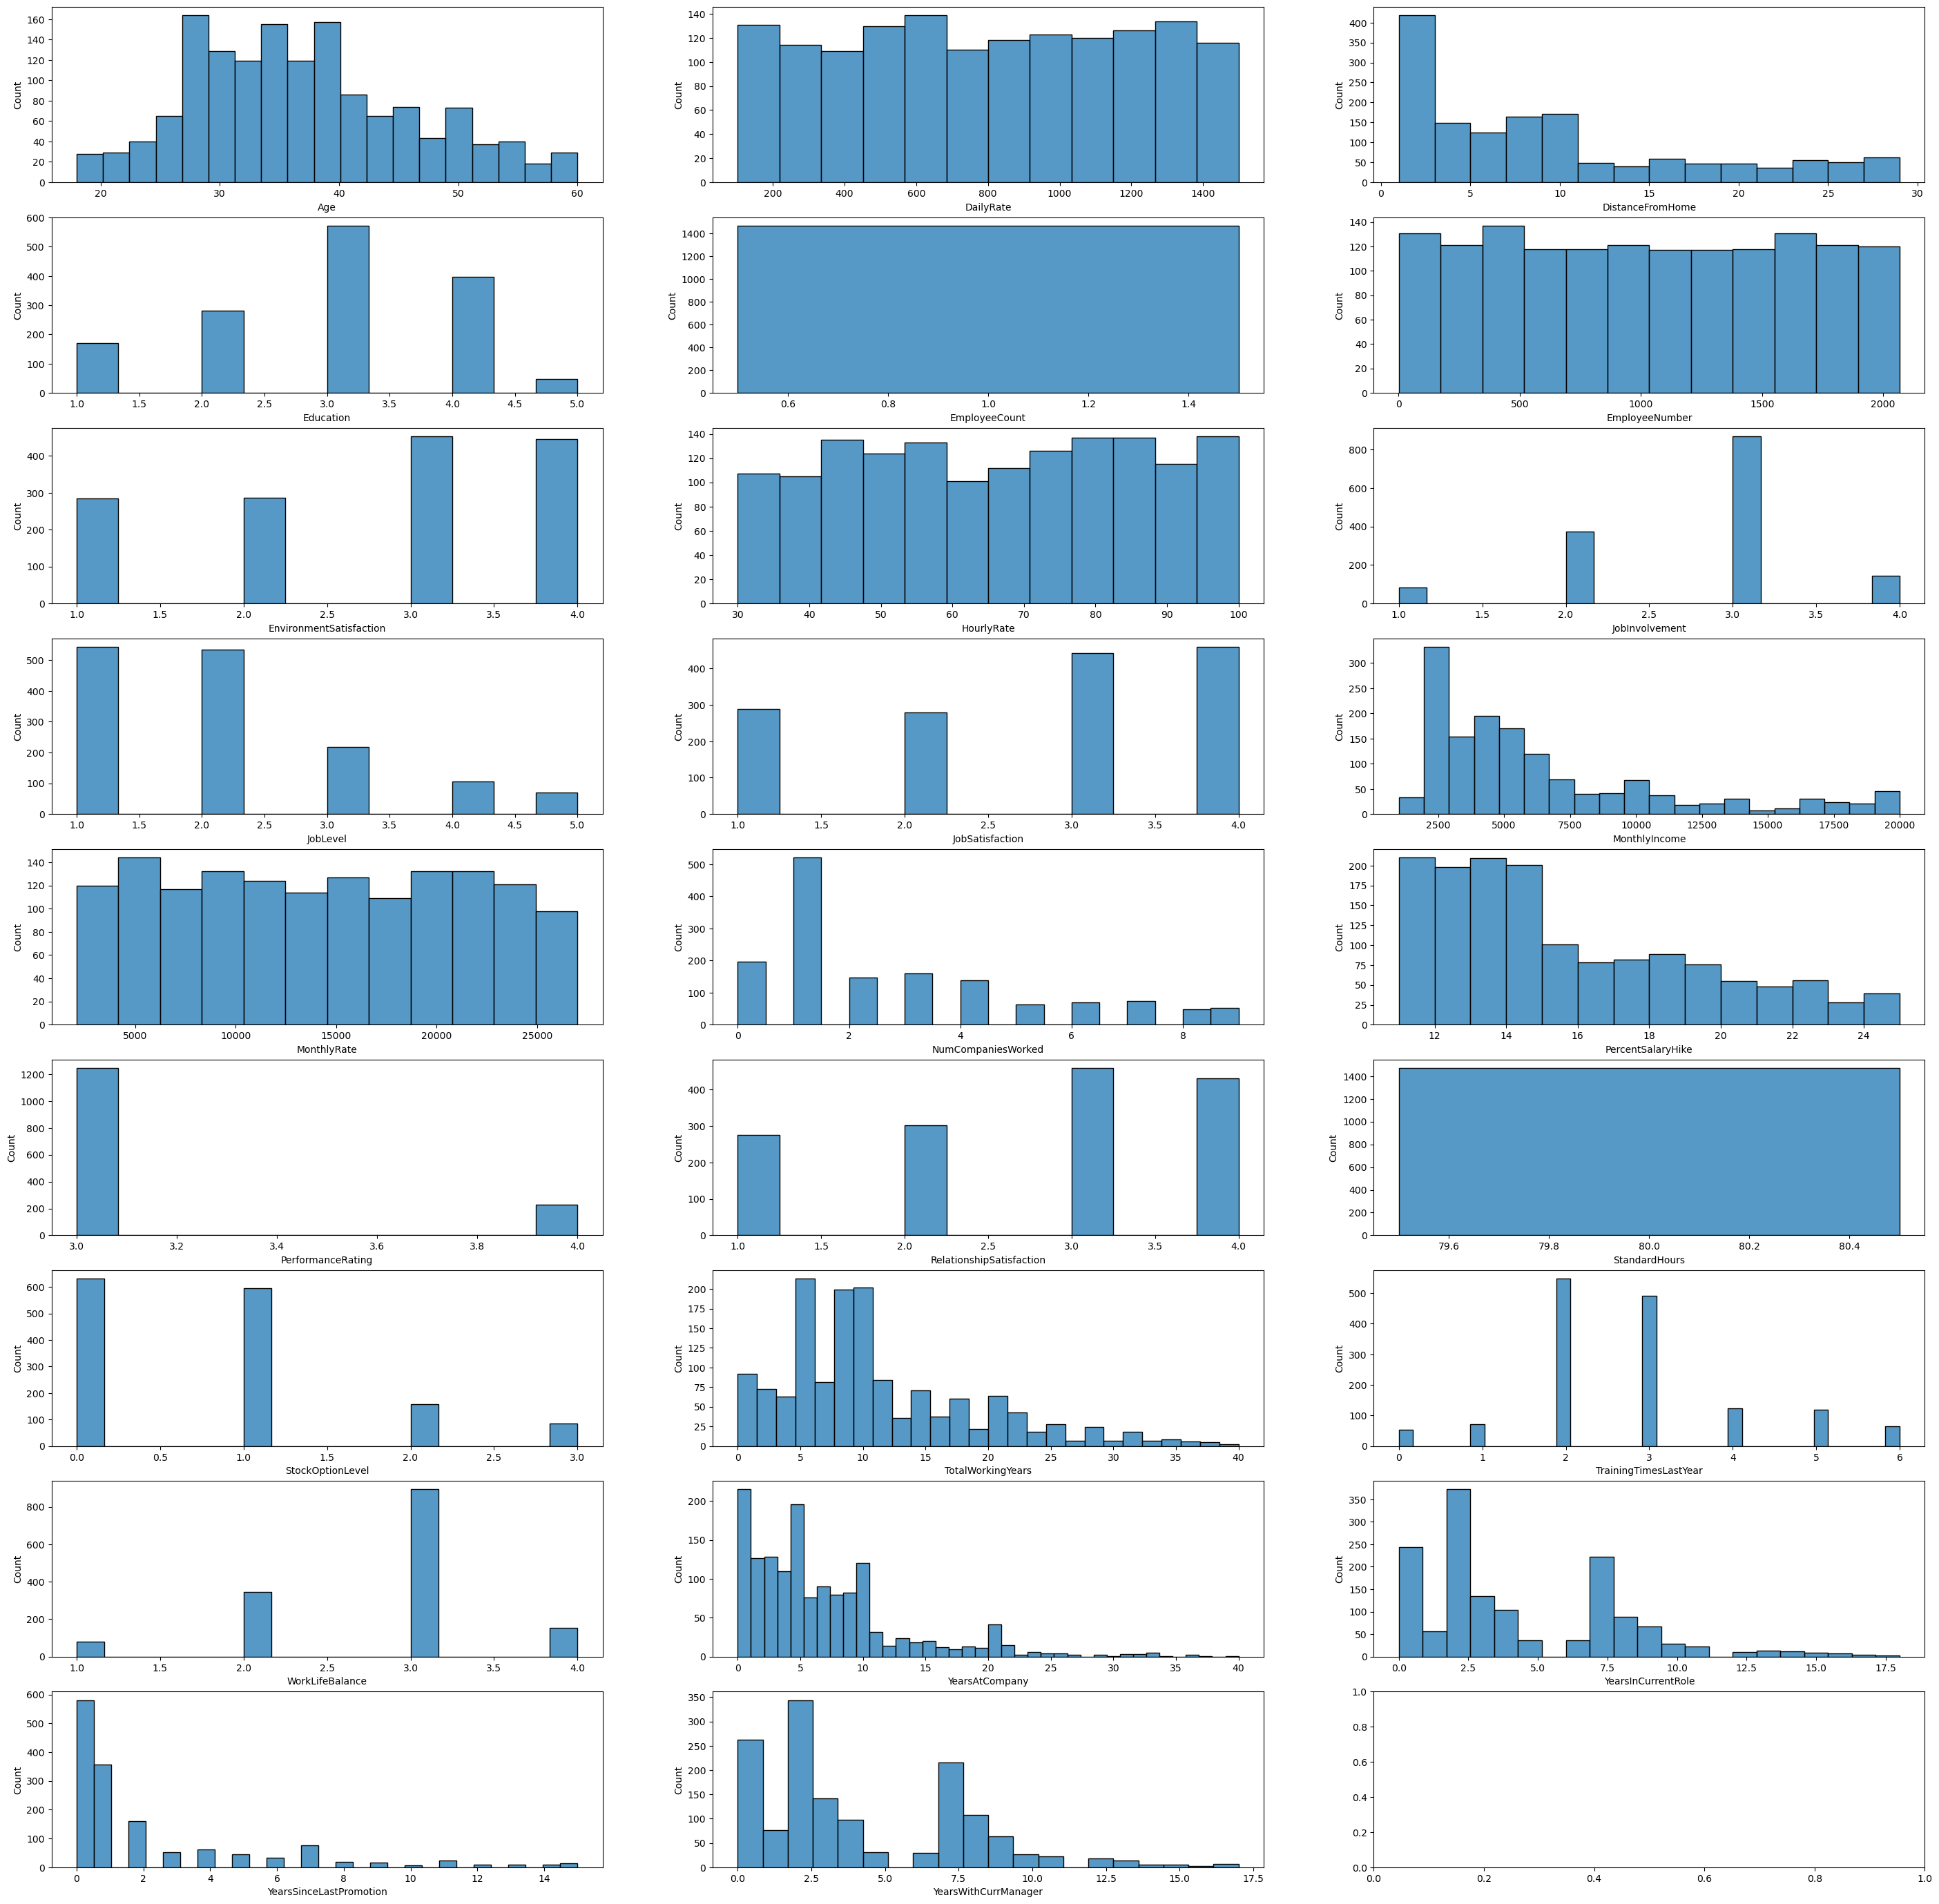

In [128]:
#Histograms for numeric columns, in one figure
nCols=3   # The number of columns in the figure
nRows=len(num_columns)//nCols+1   # The number of correspomding rows
fig,axes = plt.subplots(nRows, nCols, figsize=(35,35))
for ind,col in enumerate(num_columns):
    #Don use distplot it is deprecated
    sns.histplot(df[col],ax=axes.flatten()[ind])
plt.show()

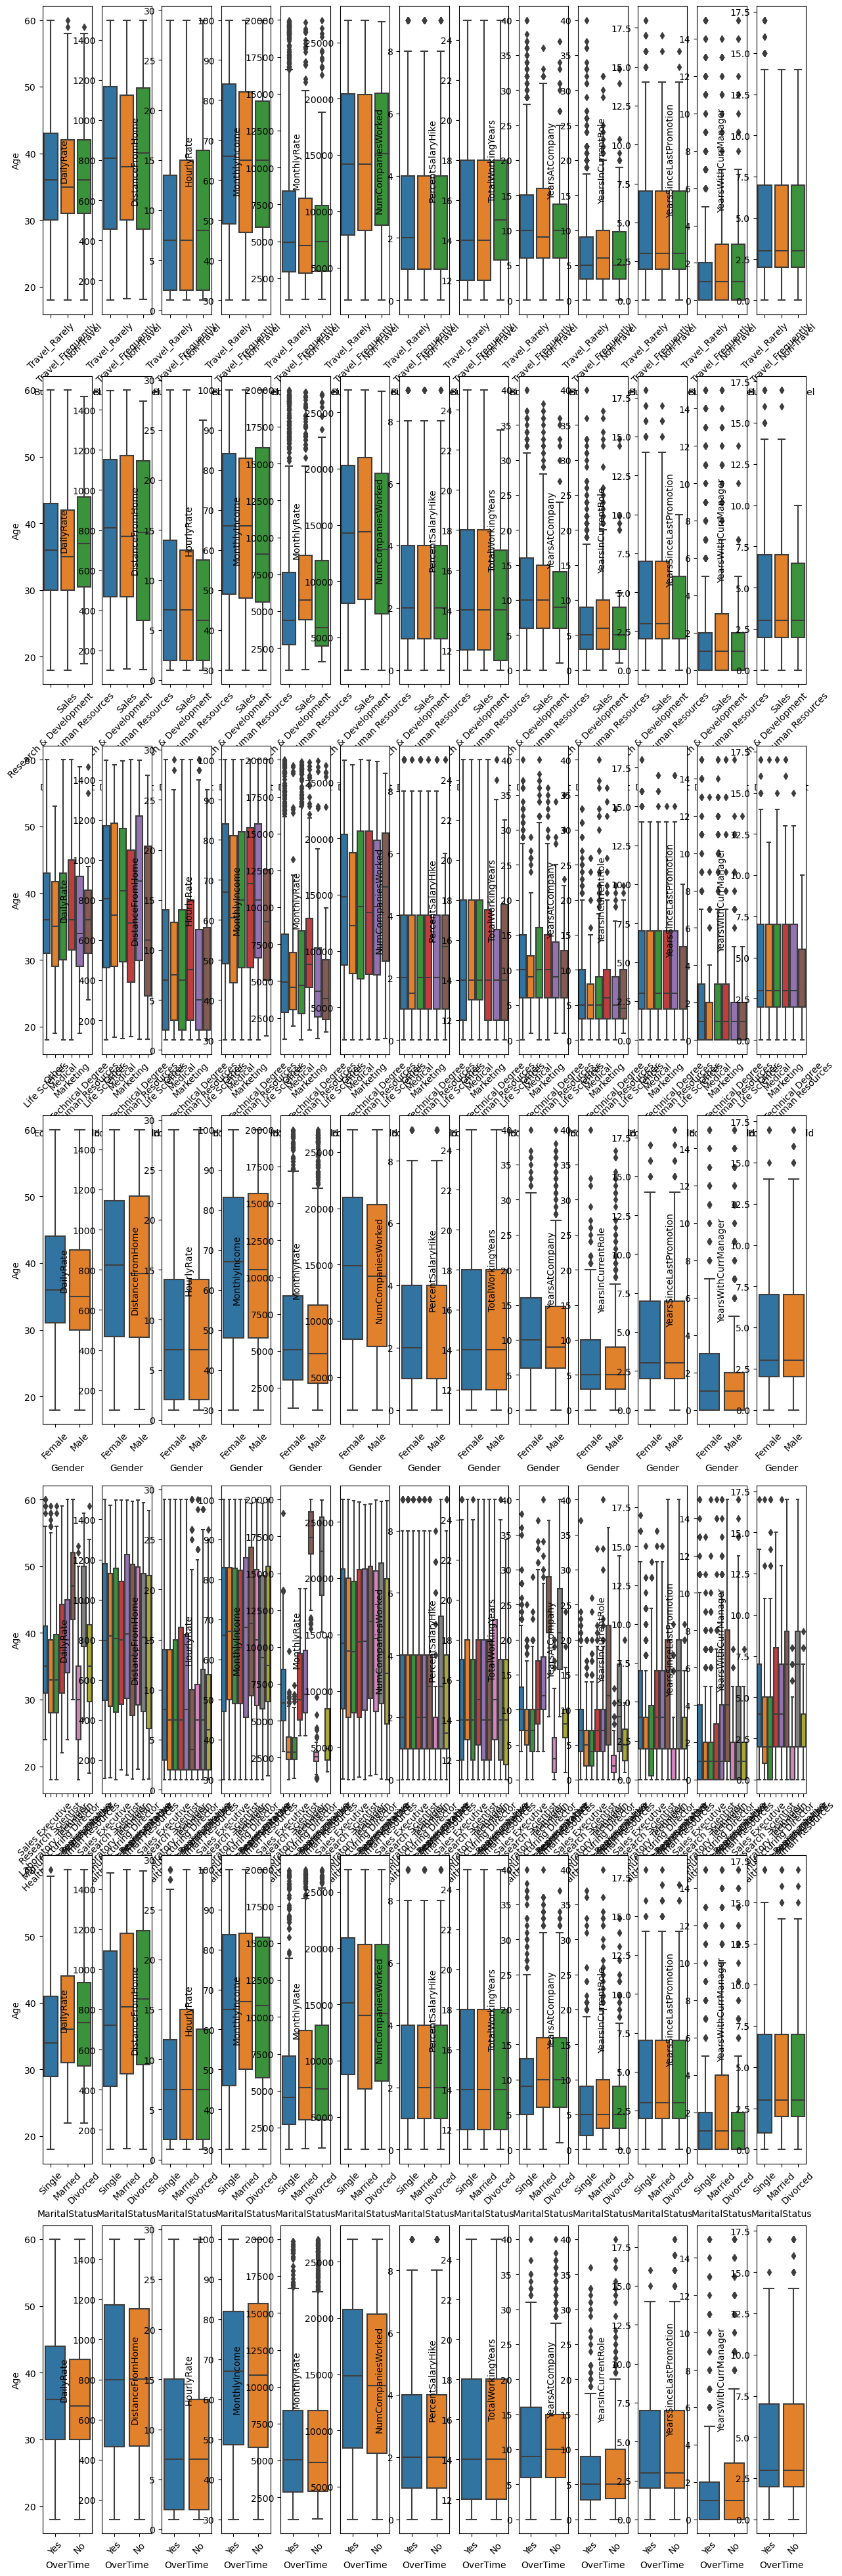

In [129]:
#We choose numerical coumns based on personal judgement
selected_num_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
#Boxplots for numeric columns, in one figure
fig,axes = plt.subplots(len(cat_columns), len(selected_num_columns), figsize=(15,50))
for c,nCol in enumerate(selected_num_columns):
    for r,cCol in enumerate(cat_columns):
        axis=axes[r][c]
        sns.boxplot(x=cCol,y=nCol,data=df, ax=axis)
        axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
plt.show()


# iii. Prepare bivariate plots (i.e., plots based on two variables).

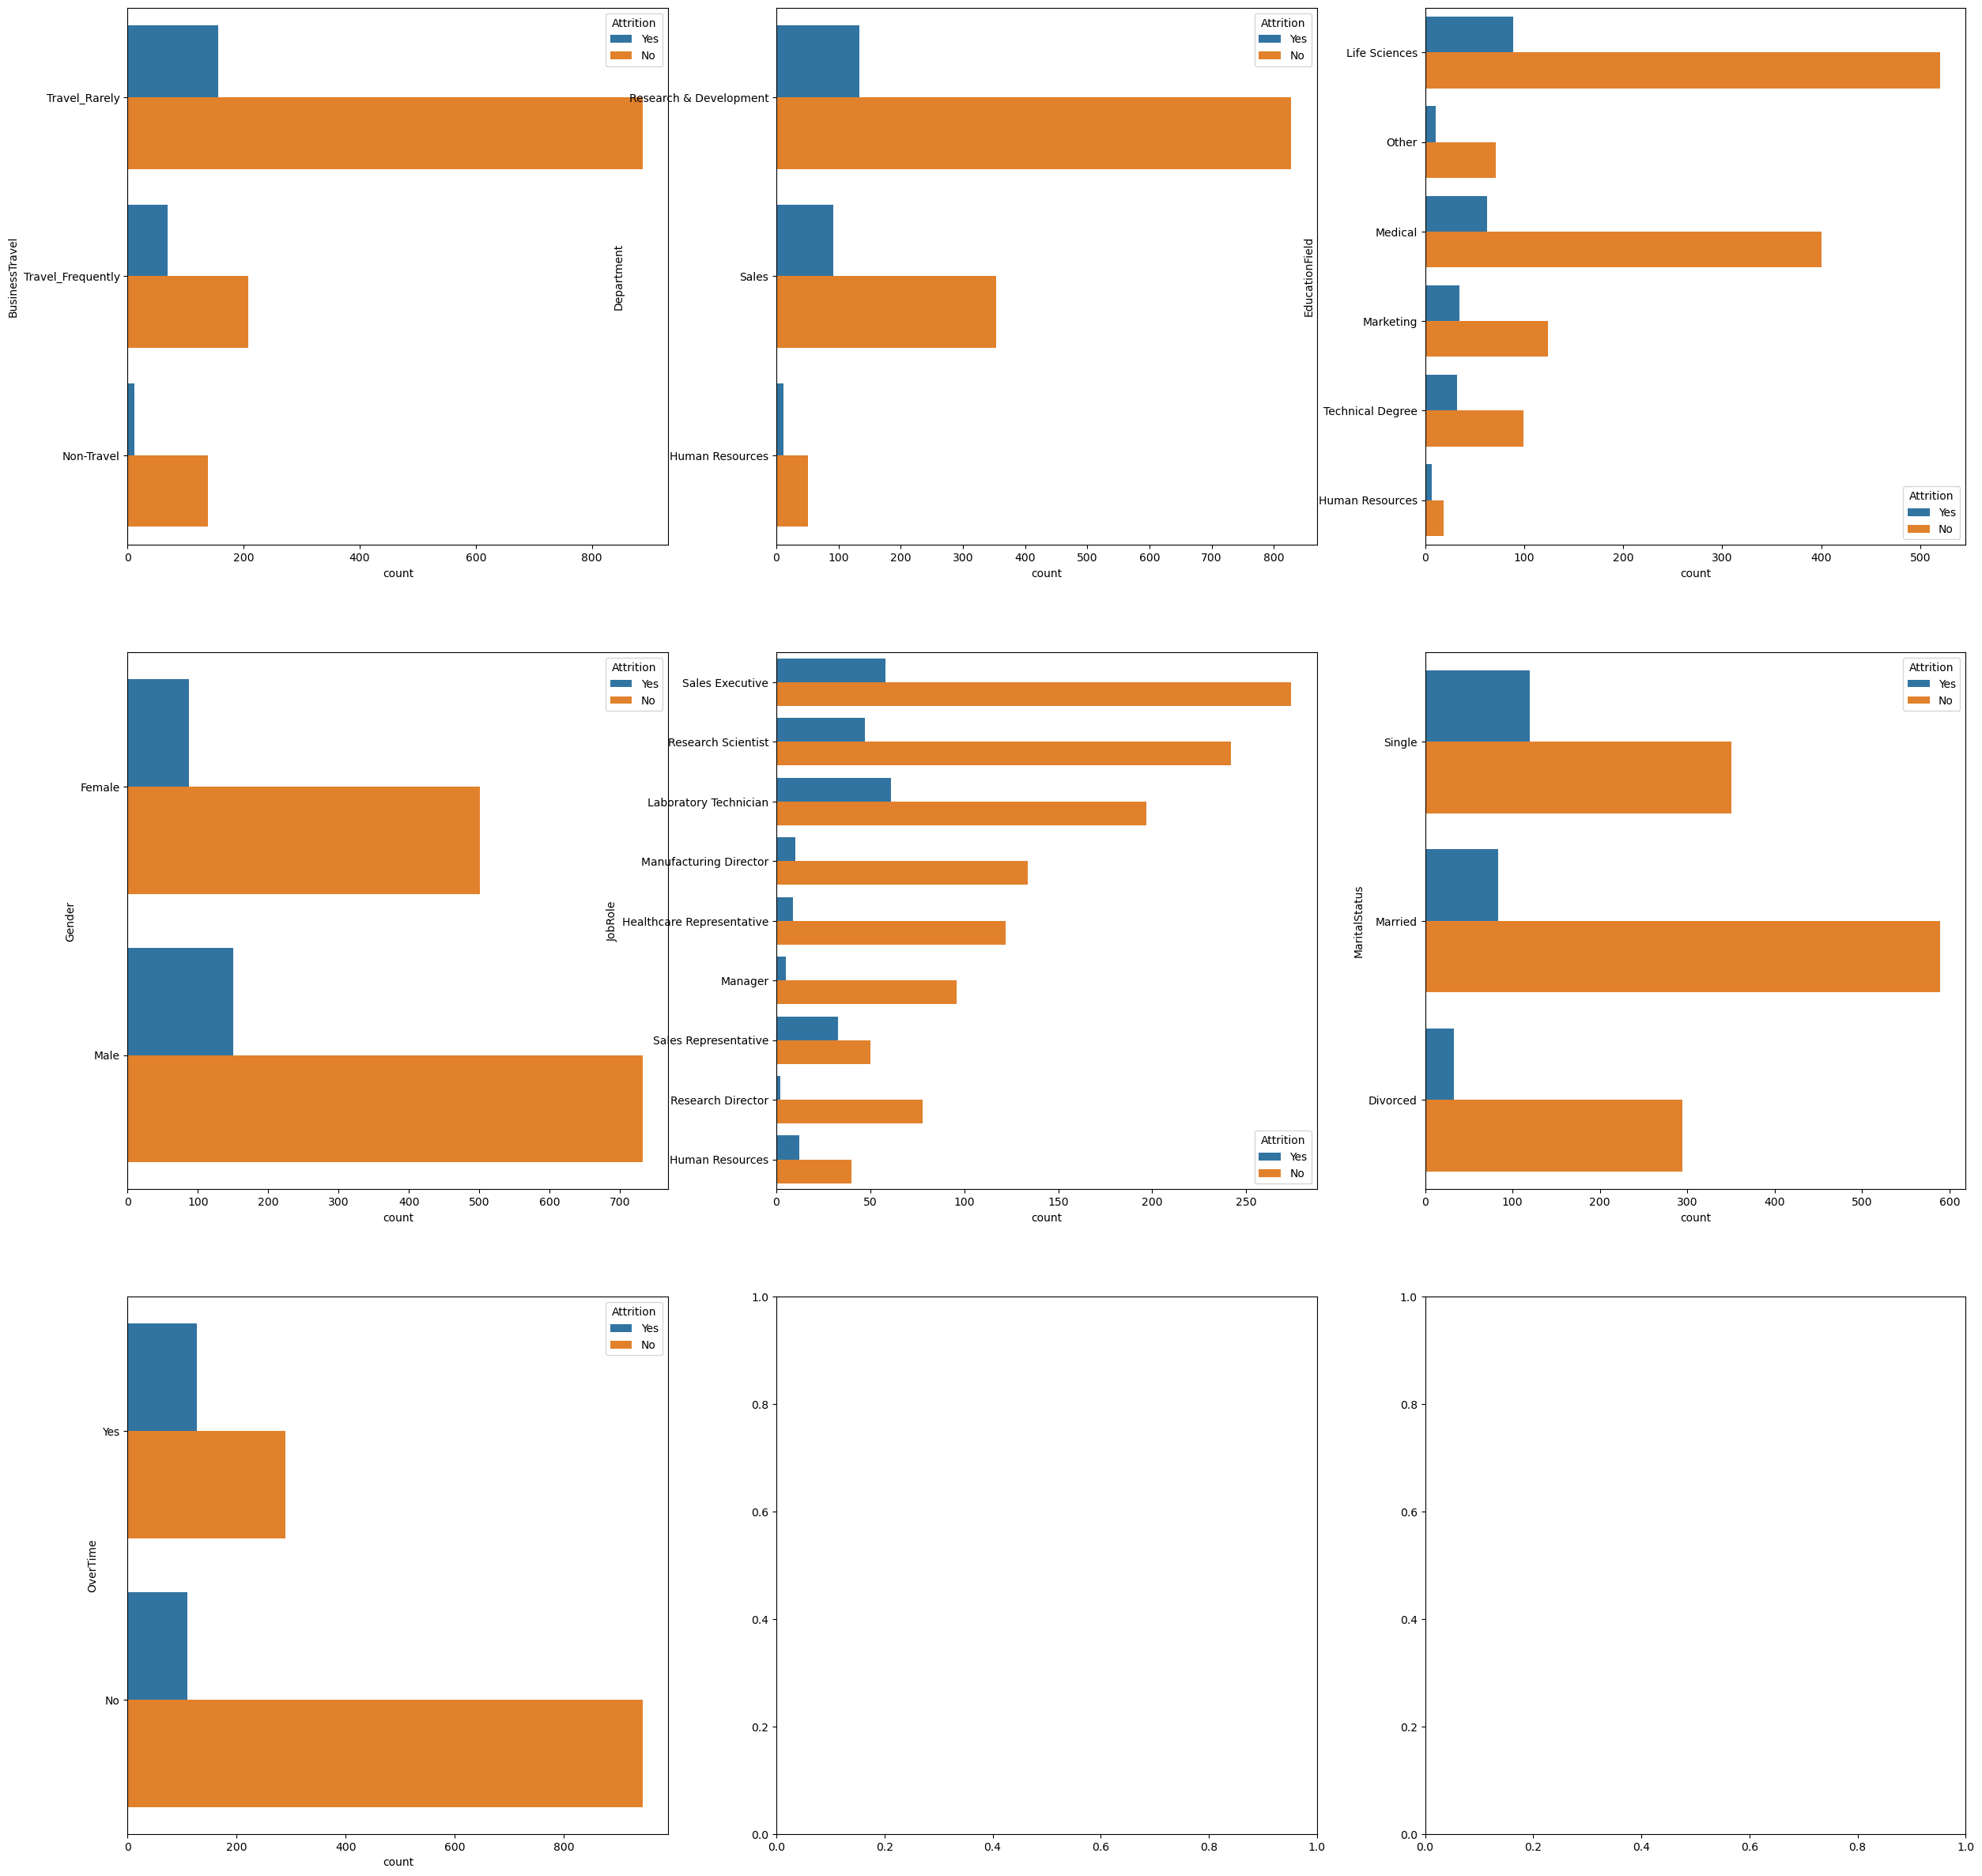

In [130]:
#Prepare bivariate plots (i.e., plots based on two variables).
nCols=3   # The number of columns that you want
nRows=len(cat_columns)//nCols+1   # The number of corresponding rows 

fig,axes = plt.subplots(nRows, nCols, figsize=(30,30))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,hue=Output,data=df,ax=axes.flatten()[ind])
plt.show()

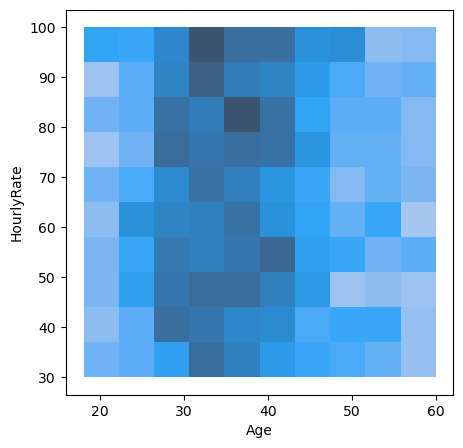

In [131]:
plt.figure(figsize=(5,5))
sns.histplot(x='Age', y='HourlyRate', bins=10, data=df)
plt.show()

# iv. Portray advanced graphs (i.e., graphs based on more than two variables).

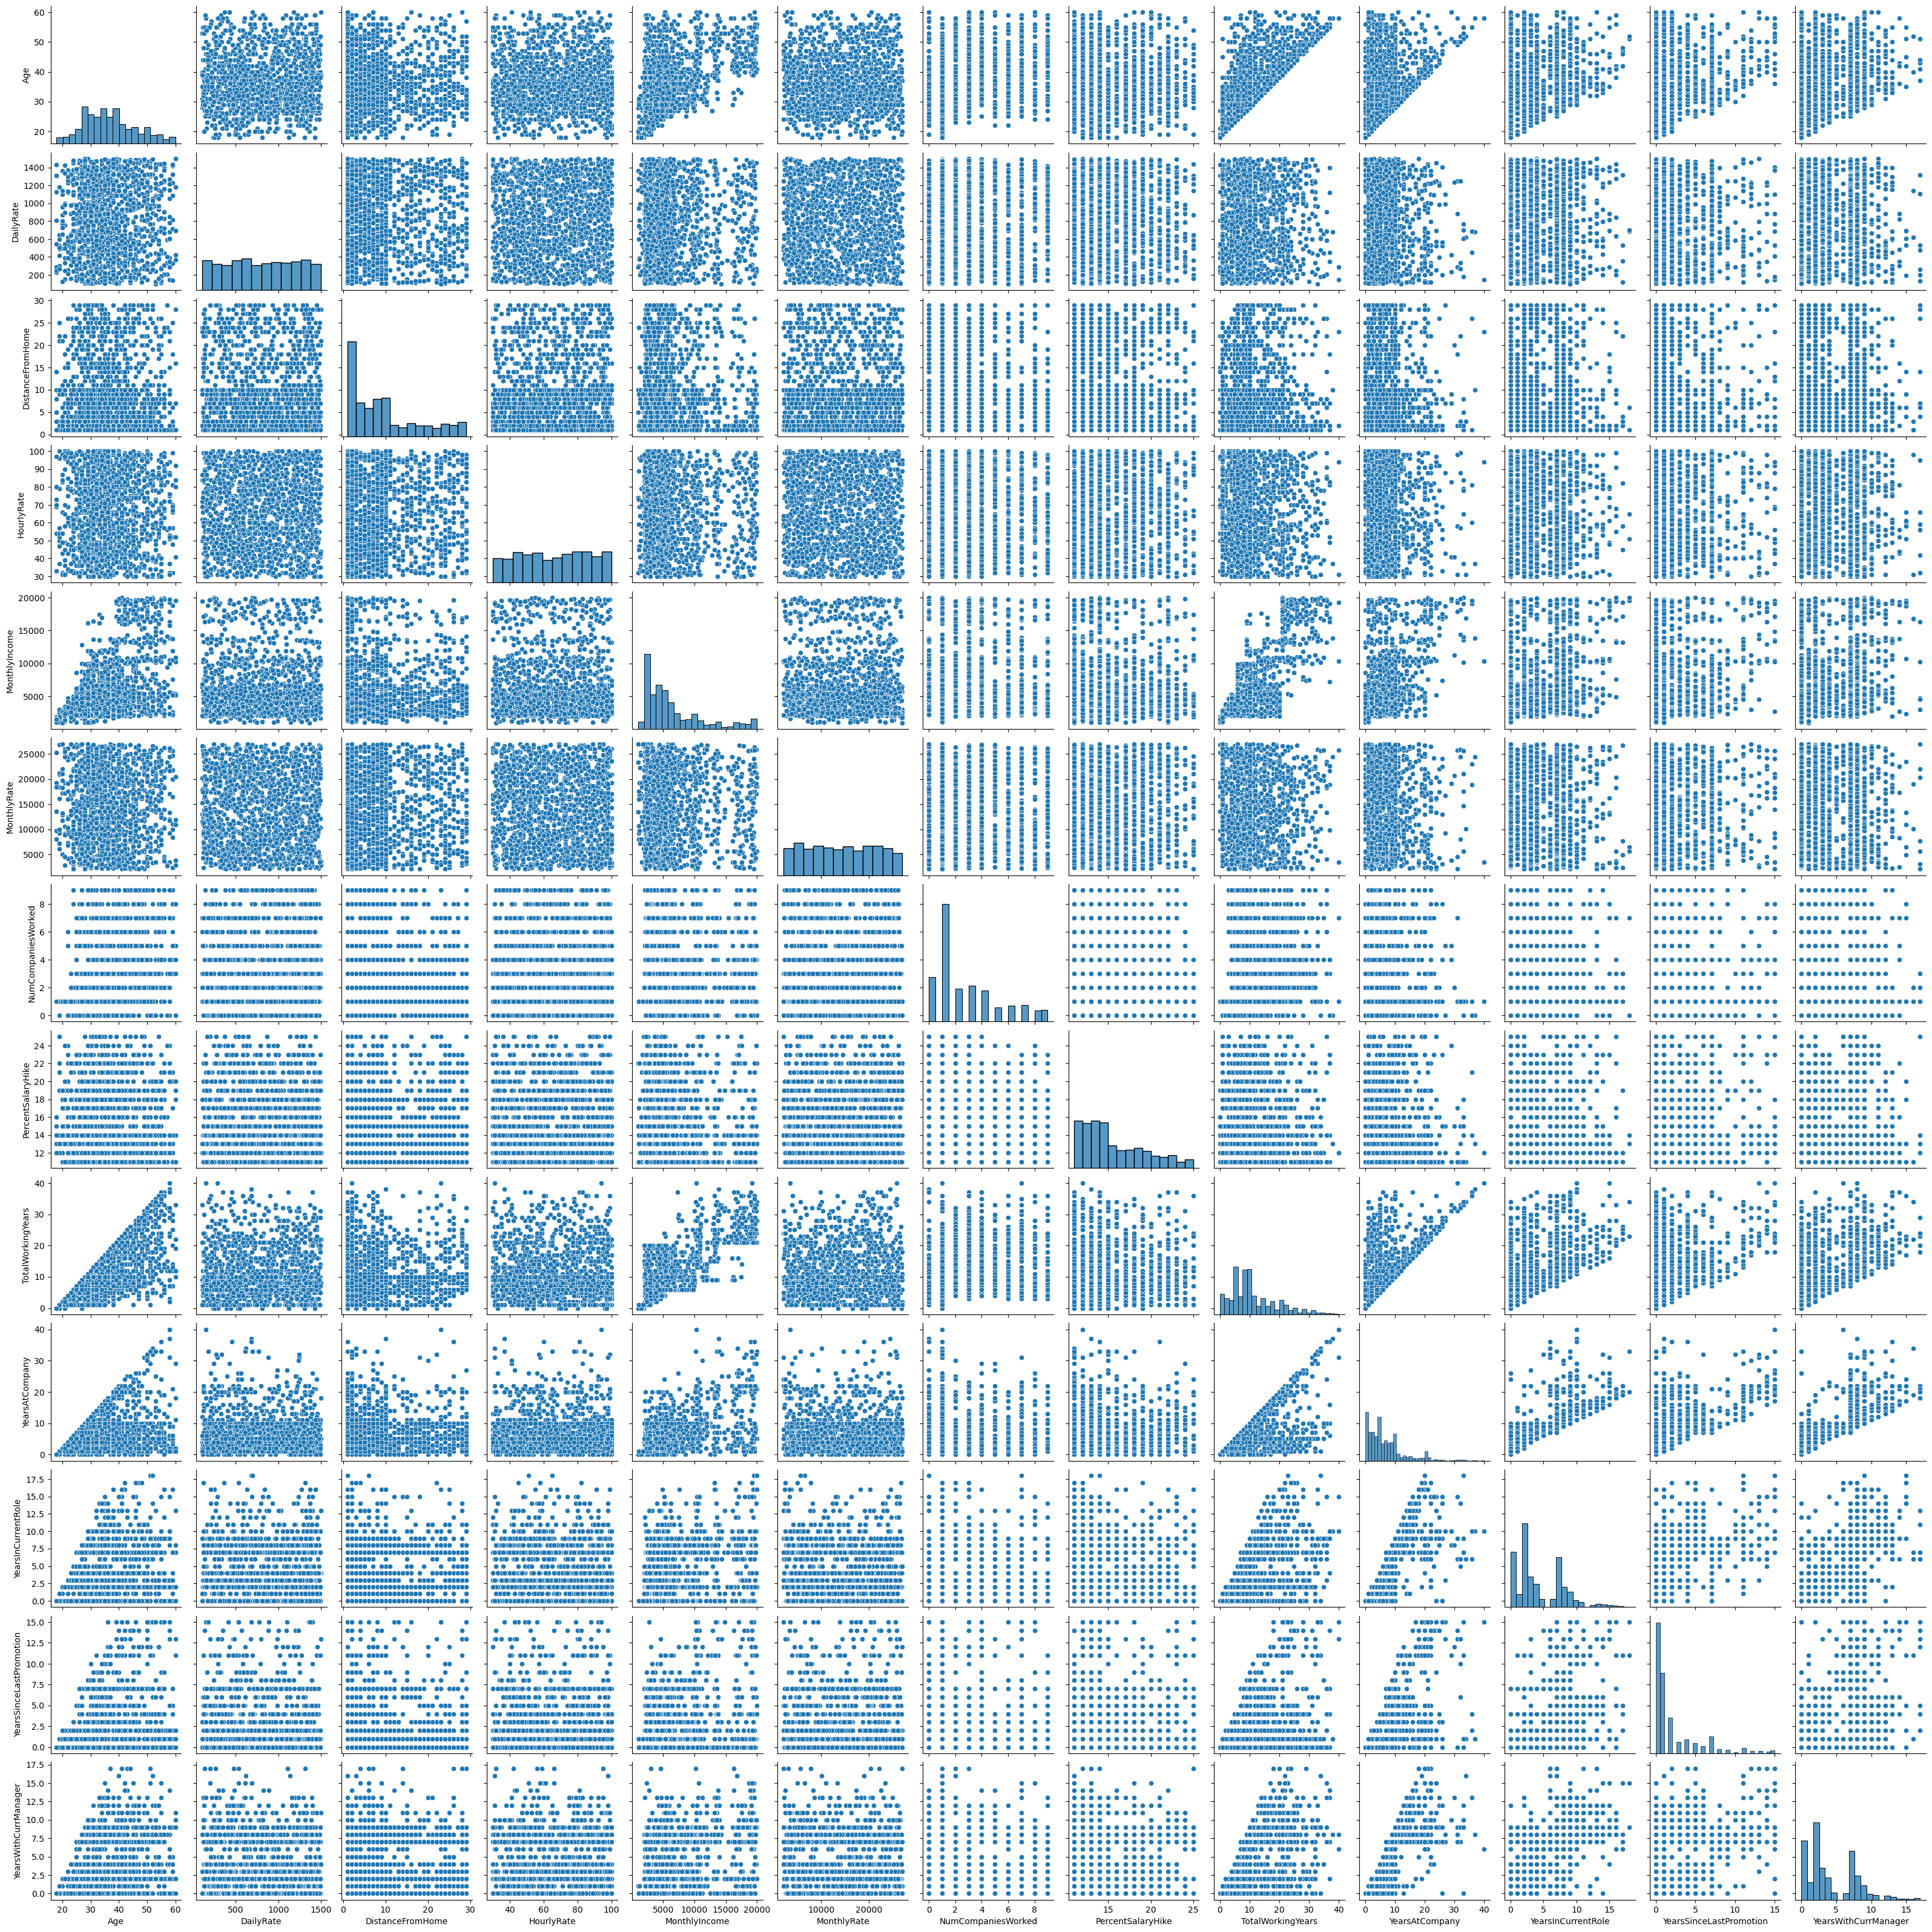

In [132]:
#Get graphs base more than two variables
#Pairplot
sns.pairplot(df[selected_num_columns]) 
plt.show()


In [133]:
#Prepare bivariate plots (i.e., plots based on two variables).
# plt.figure()
# g=sns.catplot(x="Department", col=Output, hue="EducationField", data=df, kind="count")
# g.set_xticklabels(rotation=80)
# plt.show()

In [145]:
#Make a heatmap of the correlation
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame with the 'Output' column inserted at the beginning
df_with_output = df.copy()  # Create a copy of the DataFrame
df_with_output.insert(0, 'Attrition', Output)
#ToDo: Replace categorical columns with their corresponding numeric values: Almayaman.




#display(df_with_output.head())

# Get the correlation matrix
corr = df_with_output.corr()

# Display the correlation matrix
corr.style.background_gradient(cmap='coolwarm').set_precision(1)


/var/folders/8w/l0vpf6gd4sg5mc6r97f6xht80000gn/T/ipykernel_52078/1949455405.py:14: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(1)
/Users/rashed/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/rashed/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [135]:
#Display the corelation of the catrgorical columns
corr = df_with_output.corr()


# v. Assess the relationship between variables.

Assess the relationship between variables based on the correlation matrix.
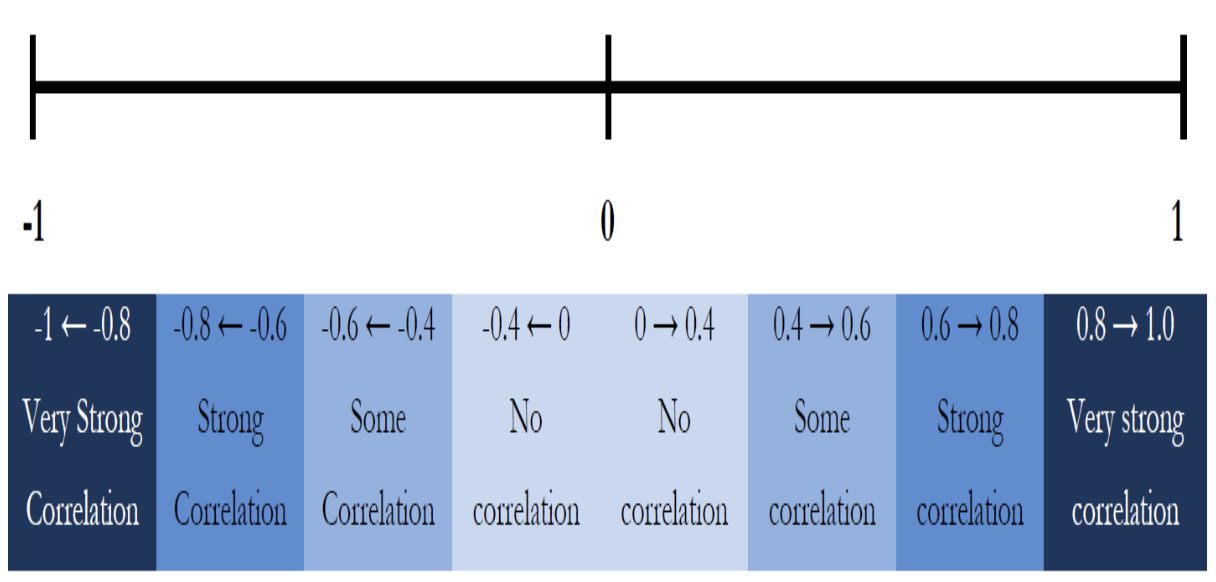
- Those are the columns that have a correlation with each other:

- Age and JobLevel - some correlation
- Age and MonthlyIncome - some correlation
- Age and TotalWorkingYears - strong correlation
- DailyRate and StockOptionLevel - some correlation
- JobLevel and MonthlyIncome - Very strong correlation
- JobLevel and TotalWorkingYears - Very Strong
- JobLevel and (YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager) - Strong correlation
- MonthlyIncome and TotalWorkingYears - Very Strong
- MonthlyIncome and (YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager) - Strong correlation
- PercentSalaryHike and PerformanceRating - Strong correlation
- TotalWorkingYears and

## Model Building:
* a. Estimate the unknown model parameters (fitting) and evaluate the model
(validation/cross-validation).
* b. Compare different models based on the performance measures.
* c. Interpret the findings and provide the details of the final selected model.

In [136]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

#Replace OverTime with 1 and 0
ndf = df_copy.copy(deep=True)
nJobRole= {'Sales Executive':0, 'Research Scientist':1, 'Laboratory Technician':2,
 'Manufacturing Director':3, 'Healthcare Representative':4, 'Manager':5,
 'Sales Representative':6, 'Research Director':7, 'Human Resources':8}

ndf["OverTime"]=ndf["OverTime"].apply(lambda x: 1 if x=='Yes' else 0)
ndf["Gender"]=ndf["Gender"].apply(lambda x: 1 if x=='Female' else 0)
ndf["Attrition"]=ndf["Attrition"].apply(lambda x: 1 if x=='Yes' else 0)

nMaritalStatus ={'Single':0, 'Married':1, 'Divorced':2}

nEducationField={'Life Sciences':0, 'Other':1, 'Medical':2, 'Marketing':3, 'Technical Degree':4,
 'Human Resources':5}

nDepartment ={'Research & Development':0, 'Sales':1, 'Human Resources':2}

nBusinessTravel ={'Travel_Rarely':0, 'Travel_Frequently':1, 'Non-Travel':2}

ndf["MaritalStatus"]=ndf["MaritalStatus"].map(nMaritalStatus )
ndf["EducationField"]=ndf["EducationField"].map(nEducationField)
ndf["Department"]=ndf["Department"].map(nDepartment)
ndf["BusinessTravel"]=ndf["BusinessTravel"].map(nBusinessTravel)
ndf["JobRole"]=ndf["JobRole"].map(nJobRole)

display(ndf)




Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               0       1102           0                 1   
1      49          0               1        279           0                 8   
2      37          1               0       1373           0                 2   
3      33          0               1       1392           0                 3   
4      27          0               0        591           0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           0                23   
1466   39          0               0        613           0                 6   
1467   27          0               0        155           0                 4   
1468   49          0               1       1023           1                 2   
1469   34          0               0        628           0                 8   

      Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0             2               0              1               1  ...   
1             1               0              1               2  ...   
2             2               1              1               4  ...   
3             4               0              1               5  ...   
4             1               0              1               7  ...   
...         ...             ...            ...             ...  ...   
1465          2               2              1            2061  ...   
1466          1               2              1            2062  ...   
1467          3               0              1            2064  ...   
1468          3               2              1            2065  ...   
1469          3               2              1            2068  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1           80.0                 0   
1                            4           80.0                 1   
2                            2           80.0                 0   
3                            3           80.0                 0   
4                            4           80.0                 1   
...                        ...            ...               ...   
1465                         3           80.0                 1   
1466                         1           80.0                 1   
1467                         2           80.0                 1   
1468                         4           80.0                 0   
1469                         1           80.0                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465               5                   2                        0   
1466              

In [137]:
from sklearn.preprocessing import StandardScaler
# Split the data into features (X) and target (y)
X = ndf.drop('Attrition', axis=1)
y = ndf['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Scaling the Train - Test splits
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
rf = RandomForestClassifier(n_estimators=2000,criterion='entropy', random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=2000, random_state=0)

In [139]:
y_pred = rf.predict(X_test)

In [140]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:=",  accuracy_score(y_test, y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, y_pred))

Accuracy:= 0.8571428571428571
Confusion Matrix:= 
 [[365   1]
 [ 62  13]]


In [141]:
param_dist = {'n_estimators': randint(50,5000),
              'max_depth': randint(1,200)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=20, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7ae101deb0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7ae25ad100>})

In [142]:
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 191, 'n_estimators': 4985}


Accuracy:= 0.8571428571428571


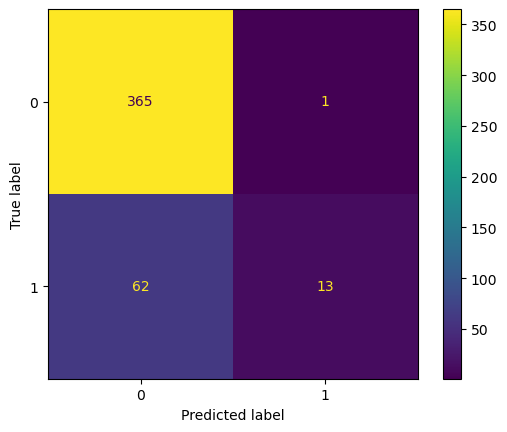

In [143]:
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
print("Accuracy:=",  accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()